In [ ]:
import pickle
def read_pickles(name):
	if '.pickle' in name:
		name = name[:-7]
	with open(name + ".pickle", "rb") as f:
		pickle_file = pickle.load(f)
	f.close()

	return pickle_file

def read_labels(f):
	file = open(f)
	top_labels = list()
	for line in file:
		top_labels.append(line[:-1])

	return top_labels
labels = read_labels('/content/62_previous_host_labels.txt')

for label in labels:
  print(label)

Nitrosative Stress
Fermented Foods and Beverages
Gestational Weight Gain
Antineoplastic Agents, Immunological
Sustainable Development
Oligodendrocyte Precursor Cells
Healthy Aging
Marijuana Use
Salpingo-oophorectomy
Long-Acting Reversible Contraception
Patient Health Questionnaire
Platelet-Rich Fibrin
Circulating Tumor DNA
Nephroureterectomy
PC-3 Cells
Carbapenem-Resistant Enterobacteriaceae
Receptors, Chimeric Antigen
Procalcitonin
Radiofrequency Ablation
Proteostasis
Dietary Sugars
Tobacco Smoking
Flexural Strength
Deep Learning
Mental Status and Dementia Tests
Whole Genome Sequencing
Liquid Biopsy
Cigarette Smoking
Work Engagement
Mycobacterium abscessus
Smokers
Frailty
Wildfires
Mice, Knockout, ApoE
Whole Exome Sequencing
THP-1 Cells
Saline Solution
Greenhouse Gases
Circulating MicroRNA
Progression-Free Survival
Anti-Citrullinated Protein Antibodies
Treatment Adherence and Compliance
Pyrolysis
Nutrients
Sexual Health
Pain, Procedural
Dietary Exposure
Academic Performance
Latent Cla

In [ ]:
import os
import numpy as np
final_similarities=dict()
for j in os.listdir('/content/'):
  if 'from' in j:
    similarities= read_pickles('/content/'+j.split('.')[0])
    for key in similarities.keys():
      if (key in labels):
        if (key not in final_similarities.keys()):
          final_similarities[key] = list()
        for pair in similarities[key]:
          final_similarities[key].append(np.max(pair[0]))
      if (key == 'Flexural Strength'):
        print(len(final_similarities[key]))
     
print(final_similarities)


for key in final_similarities:
  print(key)
  print(final_similarities[key])    






470
882
1310
1887
2417
2987
3551
4022
4515


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[0.8766540884971619, 0.8569121360778809, 0.8412061333656311, 0.8529336452484131, 0.8629623651504517, 0.8664819002151489, 0.843234121799469, 0.8473808765411377, 0.8579354882240295, 0.8419319987297058, 0.8570815920829773, 0.8359259366989136, 0.8447751402854919, 0.8394674062728882, 0.8459641337394714, 0.8040428757667542, 0.8413299322128296, 0.8181315064430237, 0.8441081047058105, 0.8503564596176147, 0.8445748090744019, 0.852753221988678, 0.8000612258911133, 0.8626369833946228, 0.8767184019088745, 0.8877369165420532, 0.8407023549079895, 0.866782546043396, 0.8381491303443909, 0.8678358197212219, 0.8669403791427612, 0.8291983008384705, 0.8133599758148193, 0.835351288318634, 0.839370846748352, 0.838273823261261, 0.8314685225486755, 0.9079560041427612, 0.8137705326080322, 0.854482889175415, 0.892343282699585, 0.8316676616668701, 0.8098575472831726, 0.8559495806694031, 0.8405786752700806, 0.8181496858596802, 0.8598384857177734, 0.8839272260665894, 0.8708392977714539, 0.8504736423492432, 0.83304

In [ ]:
import numpy as np
from sklearn import mixture
from sklearn.metrics import confusion_matrix

threshold_dict=dict()
count=0
clf = mixture.GaussianMixture(n_components=2, covariance_type='full', max_iter = 100, random_state = 24)
for key in final_similarities.keys():
  if (key in labels):
    print(key)
    X_train = np.array(final_similarities[key])
    clf.fit(X_train.reshape(-1,1))
    print(clf.means_ , '\nMidpoint value: ', np.round(np.mean(clf.means_),4))
    print()
    threshold_dict[key] = np.mean(clf.means_)
    count+=1


print(count)
    
    

Flexural Strength
[[0.78358651]
 [0.81802455]] 
Midpoint value:  0.8008

Intraepithelial Lymphocytes
[[0.84934374]
 [0.83818991]] 
Midpoint value:  0.8438

Nephroureterectomy
[[0.81252173]
 [0.78792746]] 
Midpoint value:  0.8002

Water Pipe Smoking
[[0.77990544]
 [0.80323597]] 
Midpoint value:  0.7916

Oligodendrocyte Precursor Cells
[[0.88884809]
 [0.85024986]] 
Midpoint value:  0.8695

Mycobacterium abscessus
[[0.89221257]
 [0.8577915 ]] 
Midpoint value:  0.875

Salpingo-oophorectomy
[[0.83509333]
 [0.88642897]] 
Midpoint value:  0.8608

Long-Acting Reversible Contraception
[[0.85152348]
 [0.87916671]] 
Midpoint value:  0.8653

Nitrosative Stress
[[0.81012939]
 [0.83018703]] 
Midpoint value:  0.8202

Anti-Citrullinated Protein Antibodies
[[0.86395404]
 [0.87094591]] 
Midpoint value:  0.8674

Extracellular Polymeric Substance Matrix
[[0.85570861]
 [0.83476554]] 
Midpoint value:  0.8452

Proteostasis
[[0.77976905]
 [0.79351946]] 
Midpoint value:  0.7866

Saline Solution
[[0.80842771]
 

In [ ]:
positive_examples =dict()
negative_examples= dict()
for key in final_similarities.keys():
  if key not in positive_examples.keys():
    positive_examples[key] = list()
  if key not in negative_examples.keys():
    negative_examples[key] = list()
  for value in final_similarities[key]:
    if value >= threshold_dict[key]:
      positive_examples[key].append(value)
    elif value < threshold_dict[key]:
      negative_examples[key].append(value)



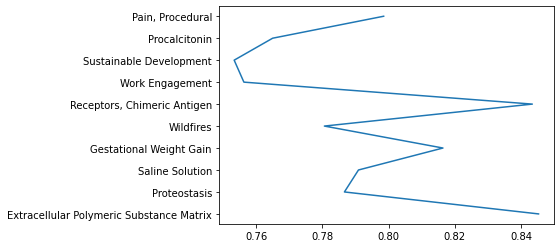

In [ ]:
from matplotlib import pyplot as plt
dict(sorted(x.items(), key=lambda item: item[1]))

keys=list()
values=list()

for key in threshold_dict.keys():
  keys.append(key)
  values.append(threshold_dict[key])

plt.plot(values[10:20],keys[10:20])

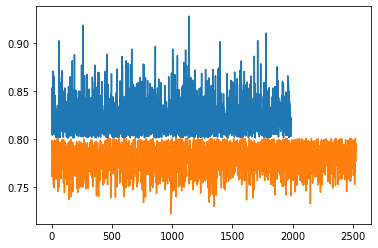

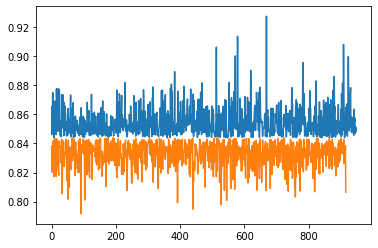

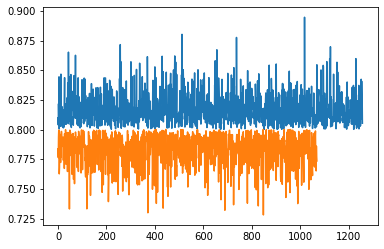

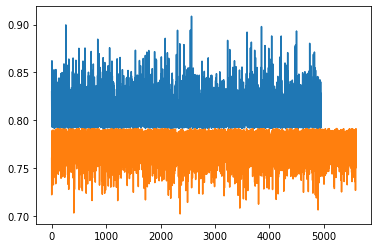

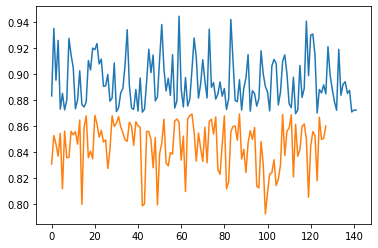

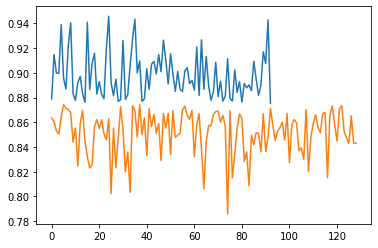

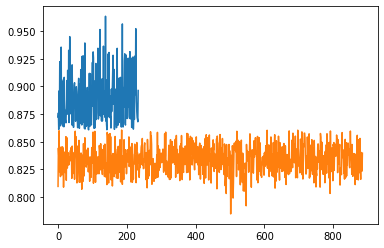

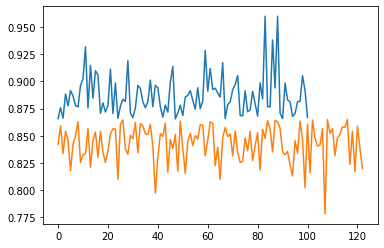

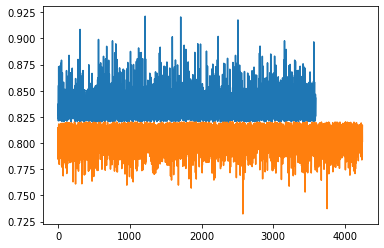

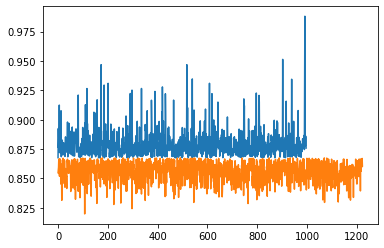

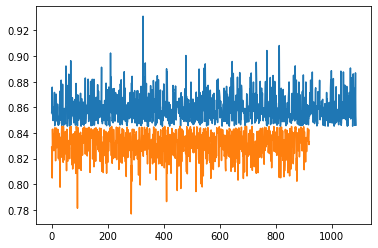

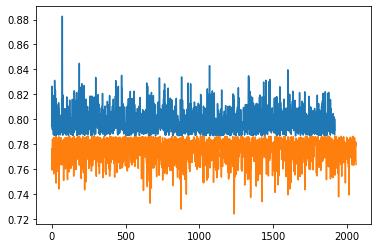

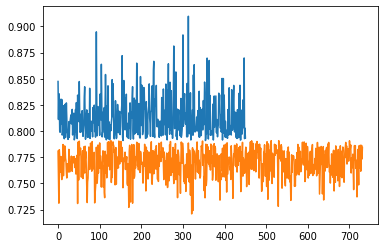

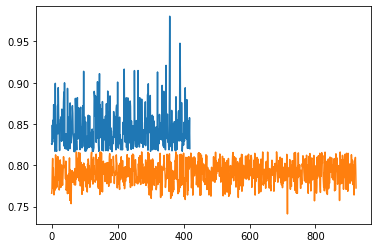

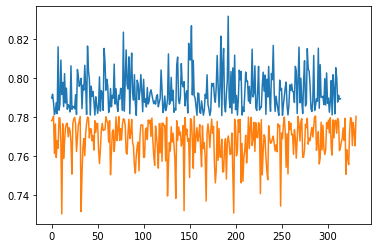

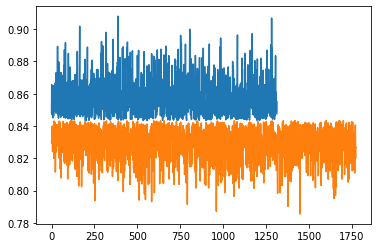

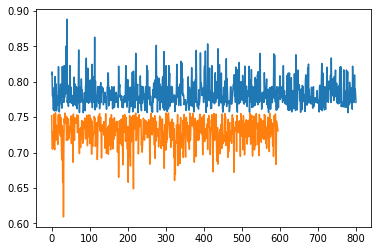

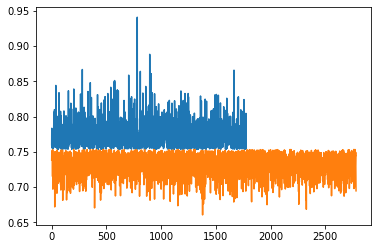

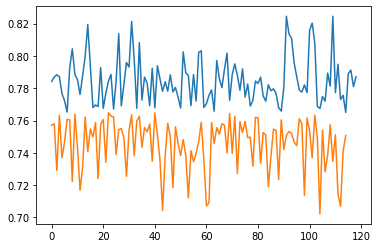

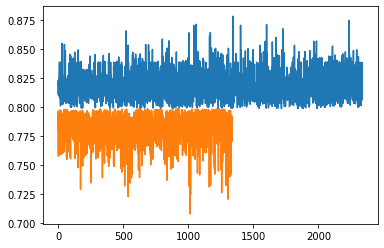

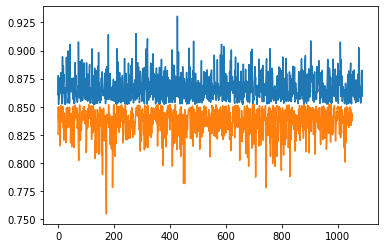

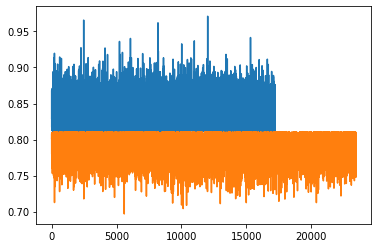

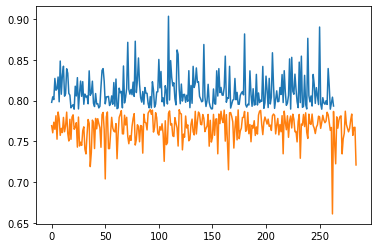

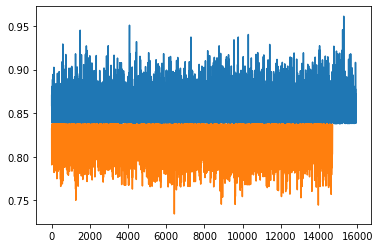

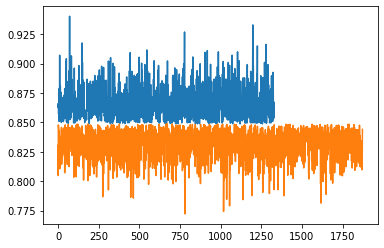

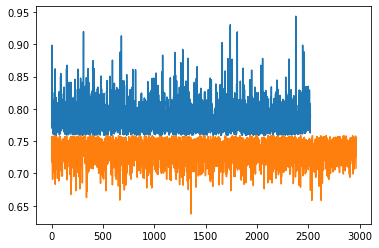

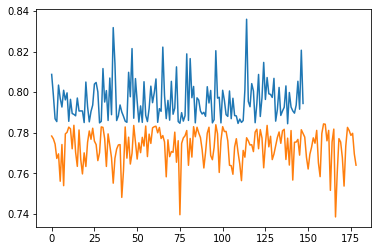

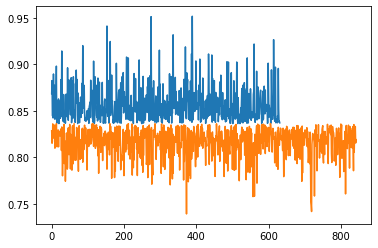

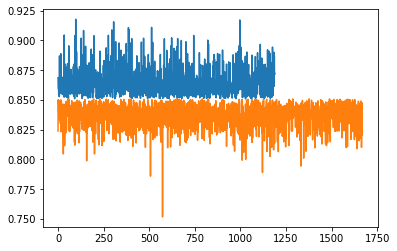

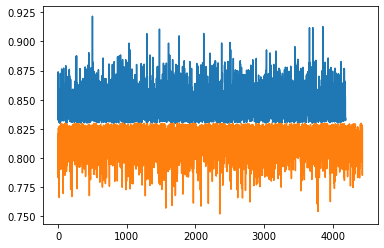

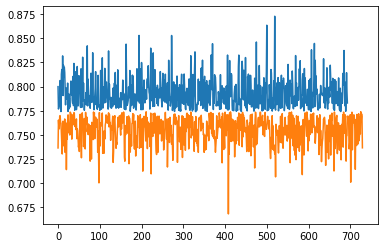

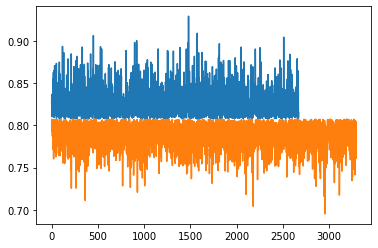

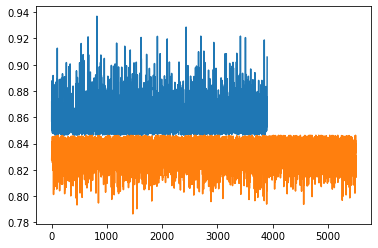

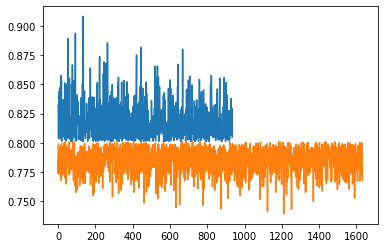

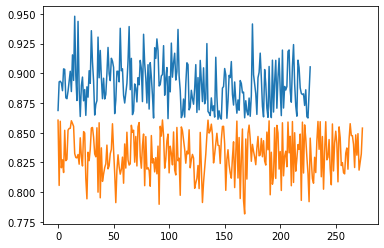

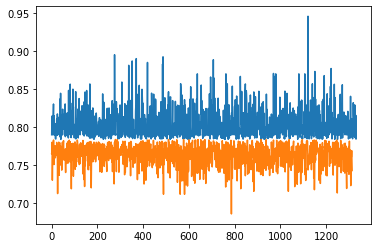

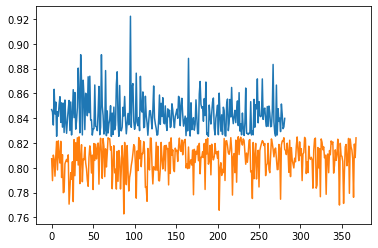

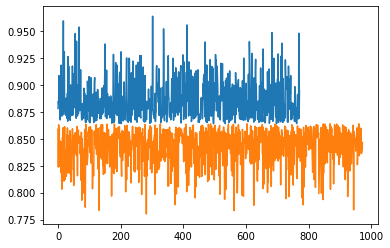

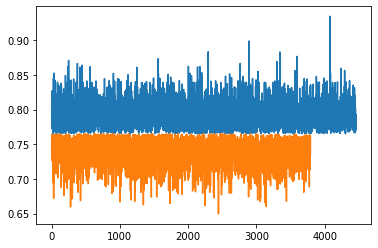

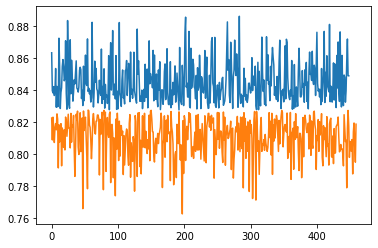

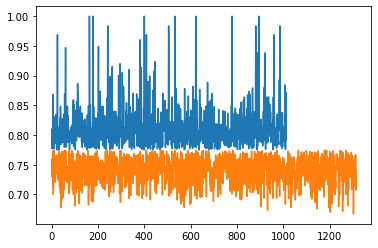

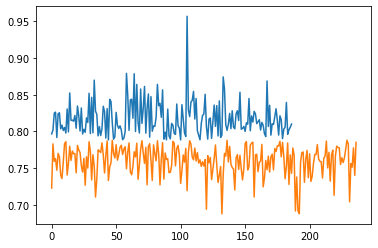

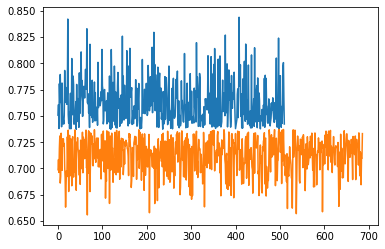

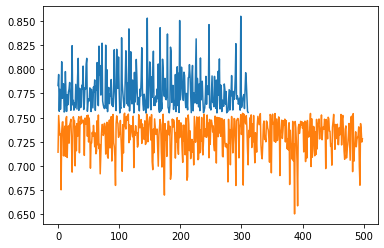

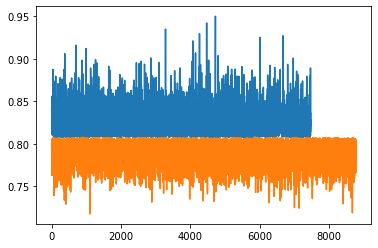

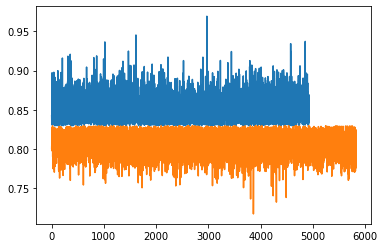

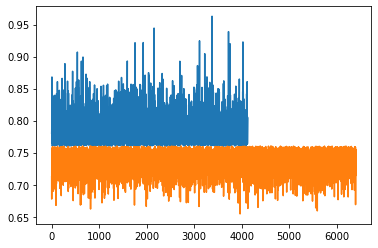

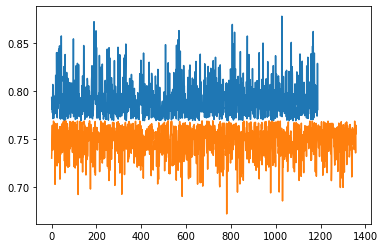

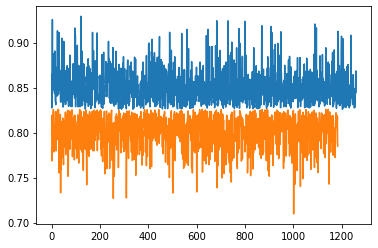

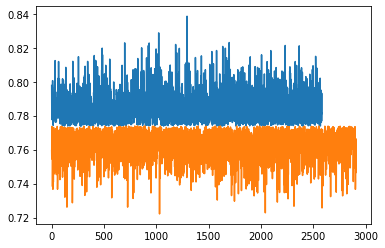

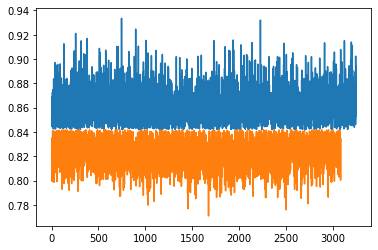

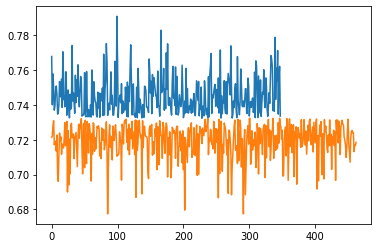

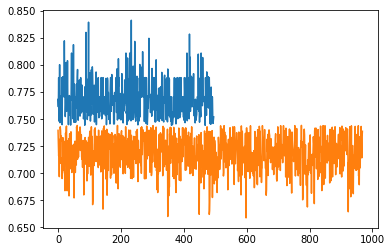

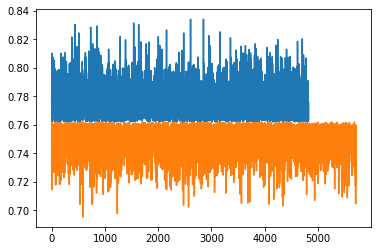

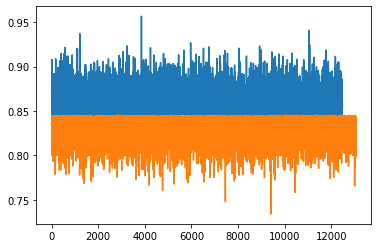

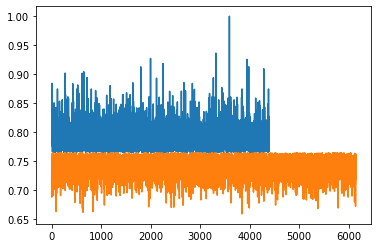

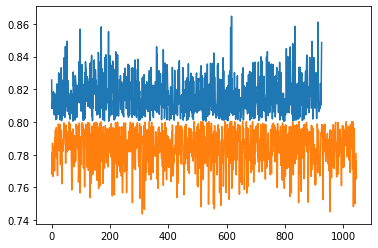

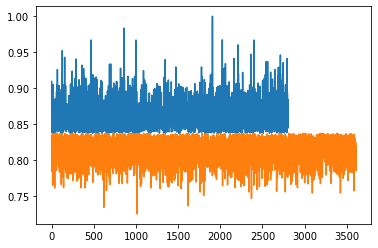

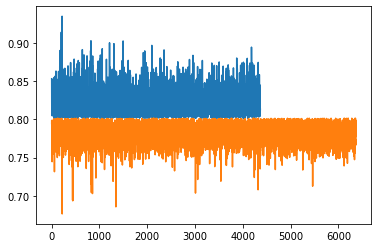

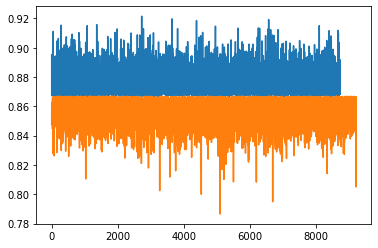

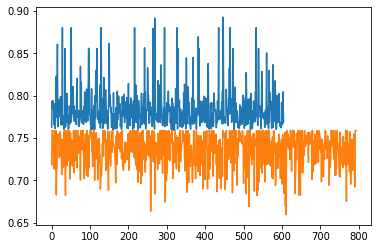

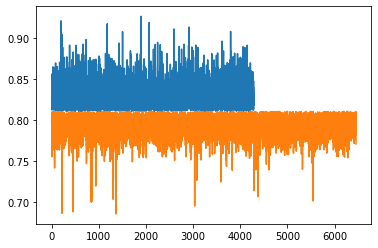

In [ ]:
from matplotlib import pyplot as plt

for key in positive_examples:
  plt.plot(positive_examples[key])
  plt.plot(negative_examples[key])
  plt.show()

31
31


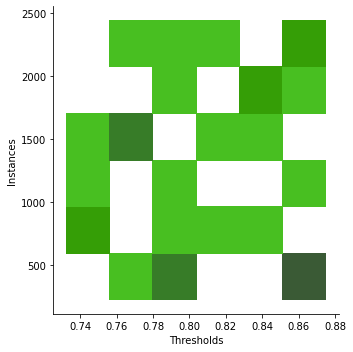

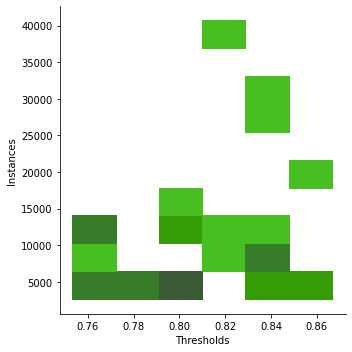

In [ ]:
import seaborn as sns
import pandas as pd
thresholds=list()
instances=list()

for key in final_similarities.keys():
  thresholds.append(threshold_dict[key])
  instances.append(len(final_similarities[key]))

data=pd.DataFrame(
    {'Thresholds': thresholds,
     'Instances': instances
    })

data2=data.sort_values('Instances')
print(len(data2[0:31]))
print(len(data2[31:62]))
sns.displot(data2[0:31],x="Thresholds",y="Instances",color='#59ff00')
sns.displot(data2[31:62],x="Thresholds",y="Instances",color='#59ff00')

In [ ]:
for key in threshold_dict:
  print(key)
  print(threshold_dict[key])



In [ ]:
with open('gmms_threshold_fu.pickle', 'wb') as f:
        pickle.dump(threshold_dict, f)
        f.close()